Abstract

## Step 1: Understand the Problem
First, familiarize ourselves with the competition details. Our goal is to predict the sales price of houses based on various features provided in the dataset. The evaluation metric is the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

## Step 2: Get the Data
- Download the Data: Go to the competition's Data page and download the training and test datasets.
- Load the Data: Load the datasets into our environment using pandas.

In [10]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Step 3: Exploratory Data Analysis (EDA)
Perform an exploratory analysis to understand the data distribution, identify missing values, and discover potential relationships between features and the target variable (`SalePrice`).

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

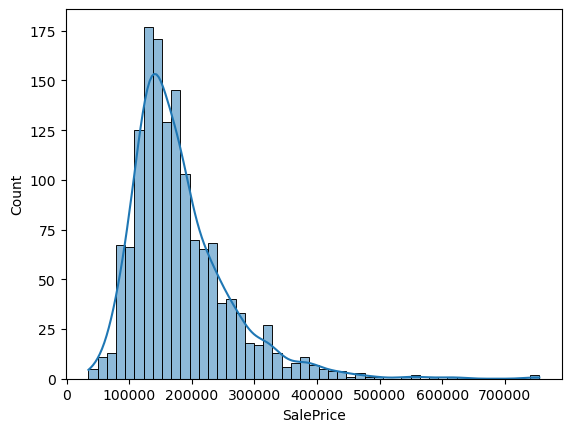

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the training set
print(train.head())

# Check for missing values
missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

# Visualize the distribution of SalePrice
sns.histplot(train['SalePrice'], kde=True)
plt.show()


## Step 4: Feature Engineering
Create new features, handle missing values, and transform existing features to better represent the underlying data.

In [22]:
# Example: Fill missing values for numerical features with the median
for column in train.select_dtypes(include=['float64', 'int64']).columns:
    train[column].fillna(train[column].median(), inplace=True)
    test[column].fillna(test[column].median(), inplace=True)

# Example: Convert categorical features using one-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align the training and test sets by the columns
train, test = train.align(test, join='left', axis=1)


C:\Users\Nazm\AppData\Local\Temp\ipykernel_5744\371647189.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].median(), inplace=True)
C:\Users\Nazm\AppData\Local\Temp\ipykernel_5744\371647189.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

KeyError: 'SalePrice'

## Step 5: Model Building
Use advanced regression techniques such as Random Forest, Gradient Boosting, and other ensemble methods.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the training data
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Validate models
rf_pred = rf_model.predict(X_valid)
gb_pred = gb_model.predict(X_valid)

rf_rmse = np.sqrt(mean_squared_error(y_valid, rf_pred))
gb_rmse = np.sqrt(mean_squared_error(y_valid, gb_pred))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gb_rmse}")


ValueError: could not convert string to float: 'RL'

## Step 6: Model Tuning and Ensembling
Fine-tune the models and combine their predictions to improve performance.

In [30]:
from sklearn.model_selection import GridSearchCV

# Example: Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

# Ensemble predictions
ensemble_pred = (rf_model.predict(X_valid) + best_gb_model.predict(X_valid)) / 2
ensemble_rmse = np.sqrt(mean_squared_error(y_valid, ensemble_pred))

print(f"Ensemble RMSE: {ensemble_rmse}")


ValueError: 
All the 36 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nazm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nazm\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nazm\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 659, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nazm\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nazm\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Nazm\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nazm\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nazm\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'RL'


## Step 7: Submission
Prepare your submission file in the required format.

## Step 8: Submit and Iterate
Submit your predictions on Kaggle and iteratively improve your model based on the feedback from the leaderboard.

Good luck, and enjoy the competition! If you have any questions or need further assistance, feel free to ask.